In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_train_path = 'Downloads/Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Downloads/Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Downloads/Fruits_Vegetables/Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)
    
    

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


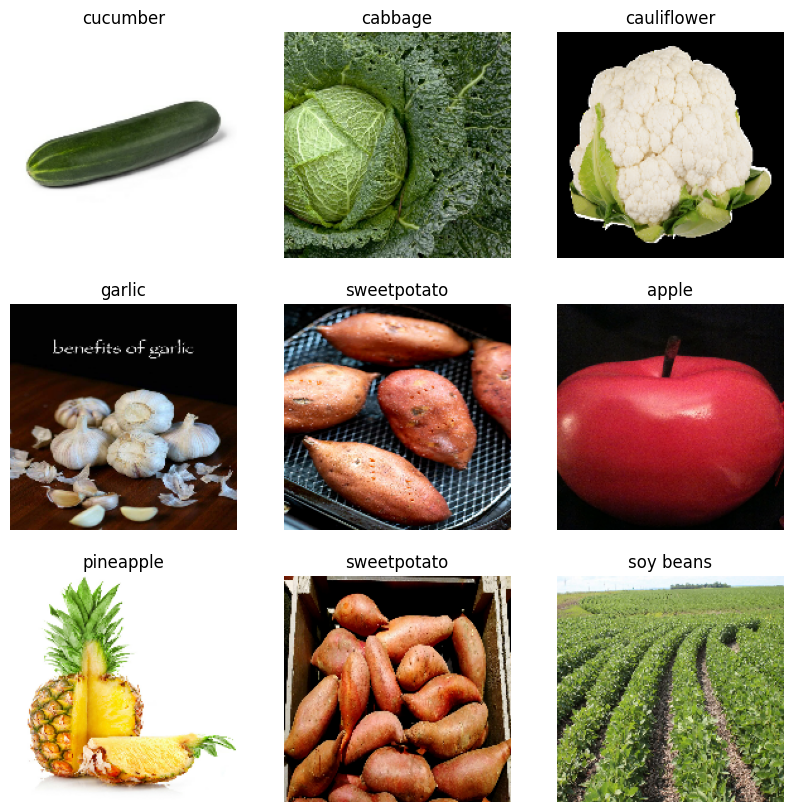

In [10]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # Corrected kernel_size
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

    
    
    
    

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [16]:
epoch_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epoch_size)


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 388ms/step - accuracy: 0.0771 - loss: 3.6201 - val_accuracy: 0.3333 - val_loss: 2.2752
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 395ms/step - accuracy: 0.2759 - loss: 2.4945 - val_accuracy: 0.6296 - val_loss: 1.4923
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.4510 - loss: 1.9427 - val_accuracy: 0.8120 - val_loss: 0.8440
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.5996 - loss: 1.3892 - val_accuracy: 0.8832 - val_loss: 0.4948
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 432ms/step - accuracy: 0.7902 - loss: 0.7820 - val_accuracy: 0.9117 - val_loss: 0.3891
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 449ms/step - accuracy: 0.8903 - loss: 0.4077 - val_accuracy: 0.9373 - val_loss: 0.3029
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 463ms/step - accuracy: 0.9375 - loss: 0.2288 - val_accuracy: 0.9430 - val_loss: 0.3383
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 512ms/step - accuracy: 0.9537 - loss: 0.1996 - val_accu

Text(0.5, 1.0, 'loss')

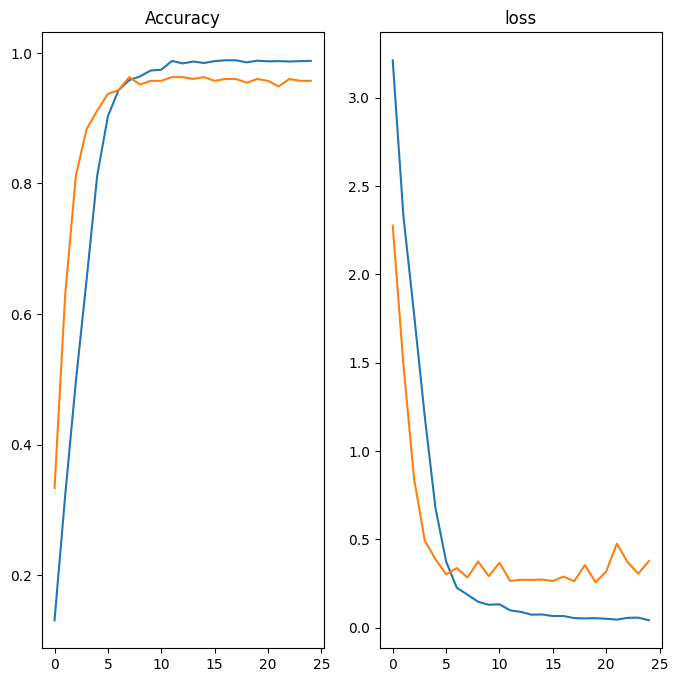

In [18]:
epochs_range=range(epoch_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('loss')




In [23]:
image_path = 'Downloads/Fruits_Vegetables/Apple.jpg'
img_height, img_width = 224, 224


image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))


image_arr = tf.keras.utils.img_to_array(image)  # Corrected variable name


img_bat = tf.expand_dims(image_arr, 0)


In [3]:
import cv2
import numpy as np

# Correct image path
image_path = 'Downloads/Fruits_Vegetables/Apple.jpg'

# Load and preprocess the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    img = cv2.resize(img, (224, 224))  # Resize to expected dimensions
    img = img.astype('float32') / 255.0  # Normalize if required
    img_bat = np.expand_dims(img, axis=0)  # Add batch dimension
    # Now you can use img_bat with your model




In [4]:
score=tf.nn.softmax(predict)

NameError: name 'tf' is not defined

In [ ]:
print('veg/fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

In [ ]:
model.save('Image_classify.keras')